In [49]:
import os
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
os.chdir('')
os.getcwd()

In [57]:
for file in os.listdir("./"):
  if not os.path.isfile(f"./{file}"):
    path = os.path.join(f"./{file}", os.listdir(f"./{file}")[0])
    print(path)

Kz-9


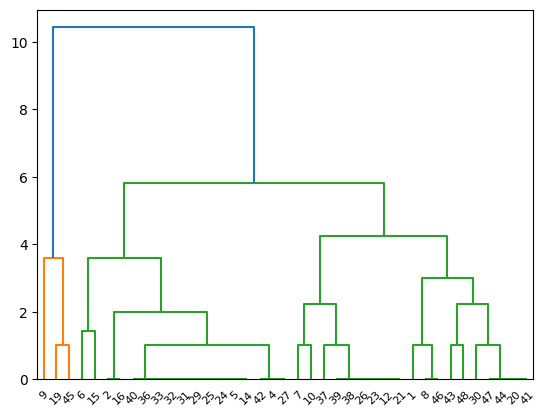

TOU-I-17


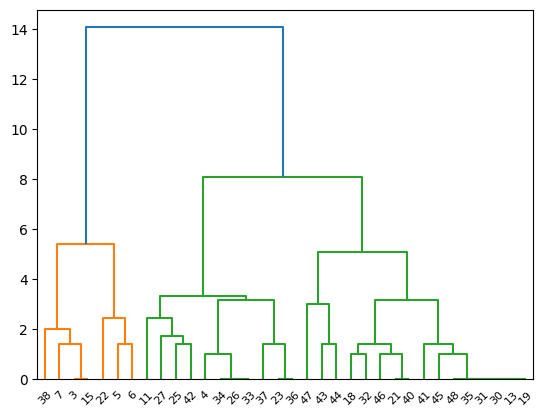

Cvi-0


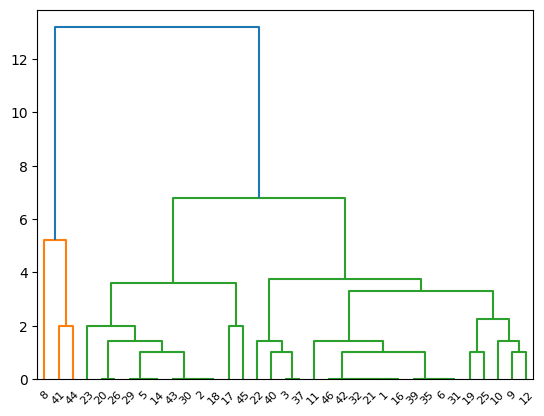

Zdr-1


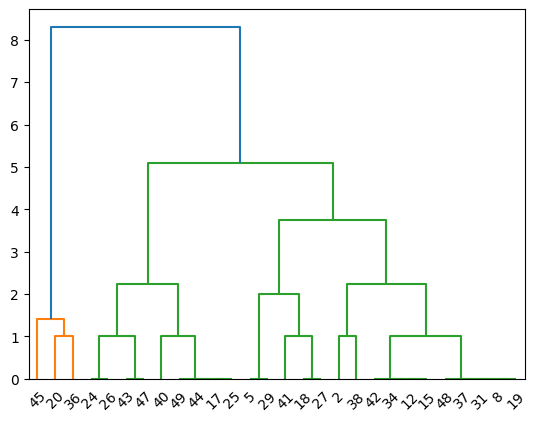

Is-1


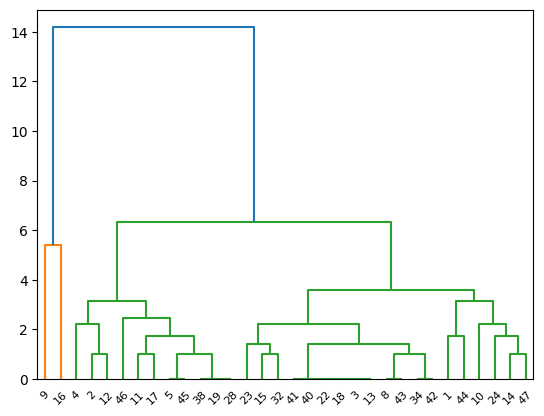

Col-0


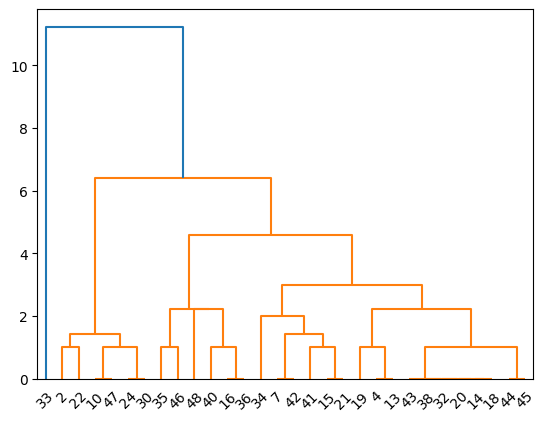

Ler-1


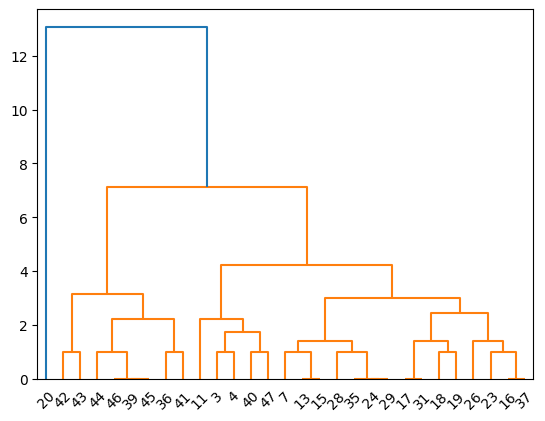

Uk-1


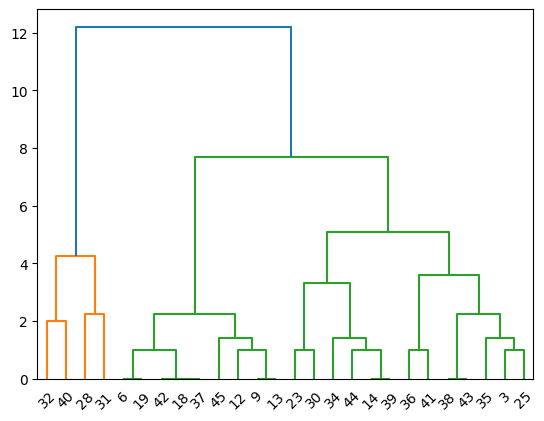

In [52]:
for file in os.listdir(os.getcwd()):
  if not os.path.isfile(os.path.join(os.getcwd(), file)):
    os.chdir(os.path.join(os.getcwd(), file))
    for f in os.listdir(os.getcwd()):
        x = re.search("xlsx$", f)
        if  x != None:
            data = pd.read_excel(f)
            index = data["Replicate"].values
            data.drop(["Replicate","Accesion"], axis = 1, inplace = True)
            #Preprocessing
            encoder = LabelEncoder()
            data["Petiole Length"] = encoder.fit_transform(data["Petiole Length"].values.reshape(-1,1))
            data["Leaf Margin"] = encoder.fit_transform(data["Leaf Margin"].values.reshape(-1,1))
            data["Leaf Shape"] = encoder.fit_transform(data["Leaf Shape"].values.reshape(-1,1))
            print(file)
            linkage_data = linkage(data, method = "complete", metric = "euclidean")
            dendrogram(linkage_data, labels = index.astype(int))
            plt.savefig("tree.pdf", bbox_inches='tight')
            plt.show()
    os.chdir("../")

In [53]:
def sim_matriz(data):
  """Creates similarity matrix"""
  matrix = np.zeros(data.shape[0]**2).reshape(data.shape[0], data.shape[0])
  for f in np.arange(data.shape[0]):
    for f2 in np.arange(data.shape[0]):
      in_common = 0
      for col in np.arange(data.shape[1]):
        if data.iloc[f, col] == data.iloc[f2, col]:
          in_common += 1
        else:
          continue 
      matrix[f, f2] = in_common / data.shape[1]
  return matrix

## Similarity matrix

In [54]:
for file in os.listdir(os.getcwd()):
  if not os.path.isfile(os.path.join(os.getcwd(), file)):
    os.chdir(os.path.join(os.getcwd(), file))
    for f in os.listdir(os.getcwd()):
        x = re.search("xlsx$", f)
        if  x != None:
            data = pd.read_excel(f)
            index = data["Replicate"].values
            data.drop(["Replicate","Accesion"], axis = 1, inplace = True)
            #Preprocessing
            encoder = LabelEncoder()
            data["Petiole Length"] = encoder.fit_transform(data["Petiole Length"].values.reshape(-1,1))
            data["Leaf Margin"] = encoder.fit_transform(data["Leaf Margin"].values.reshape(-1,1))
            data["Leaf Shape"] = encoder.fit_transform(data["Leaf Shape"].values.reshape(-1,1))
            print(file)
            data = pd.DataFrame(sim_matriz(data), index = index, columns = index)
            pd.DataFrame.to_csv(data, "similarity_matrix.csv")
    os.chdir("../")

Kz-9
TOU-I-17
Cvi-0
Zdr-1
Is-1
Col-0
Ler-1
Uk-1
